<a href="https://colab.research.google.com/github/Ybardini/Demo/blob/master/assignments/Copy_of_biol300_hw7_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

import glob
import gdal

import matplotlib.pyplot as plt

import skimage.filters
import skimage.io
import skimage.morphology

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1 (30 points)

At the end of the individual portion, you should have had a list of all the image file names for the jellyfish during the day. 

A. Now loop through those images, extract out the box for the third jellyfish, and save the total intensity of the box at each frame.



In [6]:
names = []
for name in glob.glob('/content/drive/MyDrive/Biol300/Data/jellyfish_day_10sec/*'):
  names.append(name)
names.sort()
#print(names[:10])

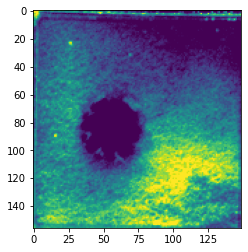

In [11]:
im = gdal.Open(names[0]).ReadAsArray()
plt.imshow(im[80:236,348:497])

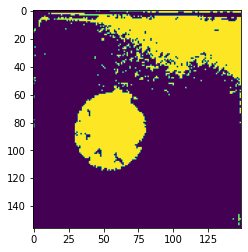

In [25]:
# correction = 60
# im_box3 = gdal.Open(names[-1]).ReadAsArray()
# thresh = skimage.filters.threshold_otsu(im_box3)
# im_bw3 = im_box3 < thresh-correction
# plt.imshow(im_bw3[80:236,348:497])

In [32]:
areas = []
correction = 60
for image in names:
  im_box3 = gdal.Open(image).ReadAsArray()[80:236,348:497]
  thresh = skimage.filters.threshold_otsu(im_box3)
  im_bw3 = im_box3 < thresh-correction
  intensity = im_bw3.sum()
  areas.append(intensity)

B. Plot these intensities over time. To set the x-axis you'll need to use the fact that there were 15 frames per second. How many pulses do you see during these 10 seconds?

In [28]:
times = []
frame = 0
while frame < 150:
  times.append(frame)
  frame+=1

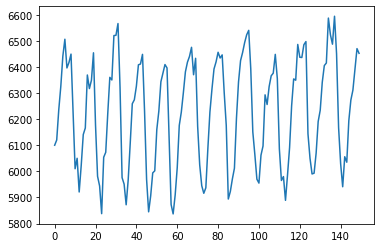

In [33]:
# plt.plot(times, areas, '.')
# plt.xlabel("Frame (10fps)")
# plt.ylabel("Intensity (pixels)");
ax = plt.axes()
ax.plot(times, areas);

C. Repeat the analysis for this same jellyfish, but for the images taken at night. How many times does the jellyfish pulse at night?

In [35]:
names_night = []
for name in glob.glob('/content/drive/MyDrive/Biol300/Data/jellyfish_day_10sec/*'):
  names_night.append(name)
names_night.sort()
#print(names_night[:10])

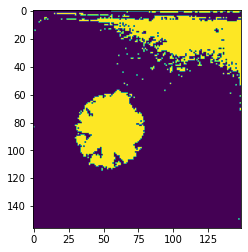

In [42]:
# correction = 75
# im_nightbox = gdal.Open(names_night[-2]).ReadAsArray()
# thresh = skimage.filters.threshold_otsu(im_nightbox)
# im_bw_night = im_nightbox < thresh-correction
# plt.imshow(im_bw_night[80:236,348:497])

In [43]:
areas_night = []
correction = 75
for image in names_night:
  im_nightbox = gdal.Open(image).ReadAsArray()[80:236,348:497]
  thresh = skimage.filters.threshold_otsu(im_nightbox)
  im_bw_night = im_nightbox < thresh-correction
  intensity = im_bw_night.sum()
  areas_night.append(intensity)

In [47]:
print(areas_night)
print(areas)

[4763, 4834, 4965, 4987, 5143, 5182, 5137, 5164, 5095, 4882, 4675, 4688, 4618, 4714, 4841, 4909, 5029, 5026, 5058, 5108, 4866, 4683, 4628, 4570, 4714, 4832, 4936, 5065, 5059, 5150, 5253, 5163, 4963, 4693, 4610, 4585, 4652, 4824, 4959, 4969, 5008, 5082, 5129, 5134, 4903, 4658, 4544, 4592, 4683, 4717, 4899, 4952, 5065, 5117, 5135, 5052, 4814, 4580, 4509, 4617, 4677, 4854, 4918, 5004, 5070, 5111, 5178, 5224, 5138, 5044, 4828, 4662, 4614, 4629, 4633, 4786, 4924, 5002, 5057, 5119, 5147, 5171, 5116, 4953, 4762, 4552, 4626, 4675, 4799, 4886, 5040, 5069, 5159, 5184, 5229, 5217, 5060, 4779, 4702, 4666, 4638, 4754, 4820, 5023, 4947, 5044, 5074, 5092, 5150, 5021, 4776, 4612, 4660, 4590, 4677, 4852, 4976, 5072, 5047, 5133, 5157, 5154, 5160, 5131, 4861, 4712, 4650, 4622, 4726, 4864, 4925, 5019, 5076, 5142, 5279, 5201, 5217, 5240, 5039, 4802, 4670, 4644, 4763, 4740, 4869, 4955, 5043, 5062, 5155, 5170]
[6100, 6120, 6235, 6325, 6441, 6506, 6396, 6417, 6449, 6230, 6010, 6050, 5921, 6023, 6141, 6166, 63

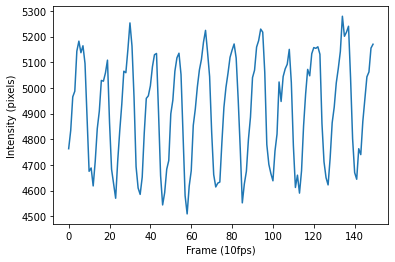

In [49]:
ax_night = plt.axes()
ax_night.plot(times, areas_night);
plt.xlabel("Frame (10fps)")
plt.ylabel("Intensity (pixels)");
#Idk why but this plot is the exact same as the day plot, something seems to be wrong

D. What differences do you notice in the jellyfish between night and day?

It turns out that these single 10-second clips don't make the differences between the night and day particular clear. Now that you have a sense of how these data were analyzed, let's take a look at the values for a much longer time frame, without messing with the images themselves. Below is the dataframe of values for 250+ seconds of images (as analyzed by yours truly!).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BIOL300_S22/data/jellyfish_values.csv")
df.head()

,time (s),day,night
0,0.000000,4.073090,9.195357
1,0.066667,3.925700,9.073050
2,0.133333,3.785661,9.073950
3,0.200000,3.715860,9.099444
4,0.266667,3.666644,9.229641


E. Now plot these values for the jellyfish over time for day and night. Note: it's probably best to make two separate plots, as night and day have their own scales of values (due to the ambient lighting in the room), making them hard to compare on a single plot.

F. Now looking over this longer time frame, what differences do you see between night and day? What do you think lead the author to conclude that jellyfish exhibit a "sleep-like state"?

# Problem 2 (40 points)

This problem is a continuation of the second problem from the previous homework. It turns out the researchers actually tested a whole range of repressor copy numbers (not just delta and R124), as they had predictions of how the gene expression (as measured by YFP) changed with increasing number of repressors. Make sure to grab the full data set from the HW7 OneDrive folder, as we now have more images to work with.

In cases like this, where we want to repeat the same analysis on many images, it is helpful to put your entire image analysis pipeline into a function that can be called repeatedly.

A. Write a function that takes in the path to an mCherry image and corresponding YFP image, and returns a list of the YFP intensities of each bacteria in the images. This basically distills everything you did last homework into a single function.



In [ ]:
def average_YFP_values(mCherry_path, YFP_path):

  return 

B. Demonstrate that your function works by testing it on the delta LacI strain we investigated last week. It should return the same results as you saw for question 2C last week. 

In [ ]:
path_mCherry = "/content/drive/MyDrive/BIOL300_S22/data/lacI_images/deltaLacI_experiment_001_mCherry.tif"
path_YFP = "/content/drive/MyDrive/BIOL300_S22/data/lacI_images/deltaLacI_experiment_001_YFP.tif"

average_YFP_values(path_mCherry, path_YFP)

C. With this, we are ready to apply your function to all the images. 
Use `glob.glob` to get all the mCherry images and YFP images, saving each as their own lists. Make sure to sort both lists so the correct images correspond with each other!

D. Now call your function on each pair of mCherry/YFP images, saving each list of YFP values.

E. Consolidate your results either into a dataframe, or into two lists (one of x-values and one of y-values). With this, plot a scatter plot of YFP intensity vs. repressor copy number (where DeltaLacI is 0 repressors, R22 is 22 repressors, etc.). 